# Wonderobe - Тестовое задание

### Задание

Найти релевантный датасет с изображениями одежды(и описанием атрибутов)

**Задача**: Обучить предиктивную модель, которая по входному изображению одежды могла бы выдавать категорию атрибута. 

Если на изображении несколько вещей гардероба, то нужно определять несколько категорий(джинсы+майка).

**Условия**: Python и tensorflow/pytorch. Код выложить на git вместе с небольшим описанием, как решалась задача.

Также, если вы будете использовать какую-то статью - приложите ссылку и напишите свои мысли по ней.

## 1. Понимание бизнеса (Business Understanding)

### I. Определить бизнес цели (Determine business objectives)

Исходя из данных проекта представленных на сайте https://www.wonderobe.me/ и Pitch deck компании бизнес цель можно сформулировать следующим образом:

Автомазицмя в стильном подборе одежды и формирования предложения на выбор на основании опыта прошлых покупок.  

### II. Оценить ситуацию (Assess situation)

**Факт анализ:** 
- Стратап предлагающий систему автоматизации подобра одежды через чат бота 
- Демонстрационный продукт 
- Комплексное решение 
    - CRM
    - e-mail marketing
    - Fashion chatbot
    - Widgets
- Fashion AI

**Заявления**
- Мы строим глобальную платформу номер 1, соединяющую бренды и покупателей, которая позволяет подбирать новую одежду к той, что уже есть в шкафу.
- Осознанное потребление и помогает получить больше комплектов одежды из меньшего количества вещей, потому что все со всем сочетается.
- Проект успешно завершил программу международного акселератора NUMA Moscow и бизнес-инкубаторе ВШЭ, является выпусником стартап-школы Y Combinator и Сколково.
- The new era of marketing communication
- One engine: many capabilities
- Wonderobe — это сервис на базе искусственного интеллекта, призванный помочь ритейлерам одежды максимально персонализировать маркетинг и продвижение товаров. 
- Мы создаем стильные образы из ассортимента магазина и одежды клиента, купленной им ранее. 
- Наше решение позволяет покупателям получить больше модных сочетаний из ограниченного количества товаров, а ритейлерам продвигать ассортимент наиболее эффективным образом.

### III. Определить цели анализа данных (Determine data mining goals)

#### Обучить предиктивную модель, которая по входному изображению одежды могла бы выдавать категорию атрибута


### IV. Составить план проекта (Produce project plan)

1. Найти датасет с изображениями одежды и описанием атрибутов
1. Выполнить описание датасета 
1. Исследовать датасет 
1. Выполнить анализ качетсва данных 
1. Подготовить данные для обучения 
    1. Отобрать данные 
    1. Очистить данные
    1. Сделать производные данные
    1. Объединить данные
    1. Привести данные в нужный формат 
1. Обучить предиктивную модель
    1. Выбрать методику моделирования 
    1. Сделать тесты для модели
    1. Постороить модель 
    1. Оценить модель 
1. Оценить результаты 

## 2. Понимание данных (Data Understanding)

### I. Собрать исходные данные (Collect initial data)

В качестве исходных данных используется dataset Fashion MNIST от Zalando: https://tech.zalando.com

Источник на GitHub: https://github.com/zalandoresearch/fashion-mnist

### II. Описать данные (Describe data)

- Тренировочный набор состоит из 60000 примеров 
- Тестовый набор состоит из 10000 примеров
- Каждый пример представляет собой изображение в оттенках серого размером 28х28, связанное с меткой из 10-ти классов.
- Каждое изображение имеет 28 пикселей в высоту и 28 пикселей в ширину, в общей сложности 784 пикселя. 
- Каждый пиксель имеет одно значение пикселя, связанное с ним, указывающее на светлоту или темноту этого пикселя, причем более высокие числа означают более темный цвет. 
- Значение пикселя является целым числом от 0 до 255.
- Обучающие и тестовые наборы данных содержат 785 столбцов.
- Первая колонка состоит из меток класса и представляет собой предмет одежды. 
- Остальные столбцы содержат значения пикселей соответствующего изображения.

### III. Исследовать данные (Explore data)

#### Метки

Каждому учебному и тестовому примеру присваивается одна из следующих меток:

* 0 T-shirt/top
* 1 Trouser
* 2 Pullover
* 3 Dress
* 4 Coat
* 5 Sandal
* 6 Shirt
* 7 Sneaker
* 8 Bag
* 9 Ankle boot

* Каждая строка - это отдельное изображение
* Столбец 1 - это метка класса.
* Остальные столбцы - это номера пикселей (всего 784).
* Каждое значение-это темнота пикселя (от 1 до 255)

### IV. Проверить качество данных (Verify data quality)

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras as ks

In [10]:
fashion_mnist = ks.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#### train_images

In [11]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [12]:
print("Размерность train_images: {}".format(train_images.ndim))

print("Форма train_images: {}".format(train_images.shape))

print("Количество элементов в массиве train_images: {}".format(train_images.size))

print("Тип элементов в массиве train_images: {}".format(train_images.dtype))

Размерность train_images: 3
Форма train_images: (60000, 28, 28)
Количество элементов в массиве train_images: 47040000
Тип элементов в массиве train_images: uint8


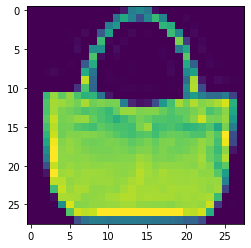

In [13]:
plt.imshow(train_images[100,:])

#### test_images

In [14]:
test_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [15]:
print("Размерность test_images: {}".format(test_images.ndim))

print("Форма test_images: {}".format(test_images.shape))

print("Количество элементов в массиве test_images: {}".format(test_images.size))

print("Тип элементов в массиве test_images: {}".format(test_images.dtype))

Размерность test_images: 3
Форма test_images: (10000, 28, 28)
Количество элементов в массиве test_images: 7840000
Тип элементов в массиве test_images: uint8


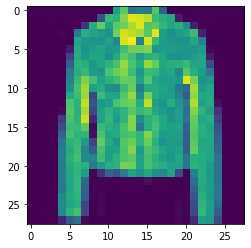

In [16]:
plt.imshow(test_images[10,:])

#### train_labels

In [17]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [18]:
print("Размерность train_labels: {}".format(train_labels.ndim))

print("Форма train_labels: {}".format(train_labels.shape))

print("Количество элементов в массиве train_labels: {}".format(train_labels.size))

print("Тип элементов в массиве train_labels: {}".format(train_labels.dtype))

Размерность train_labels: 1
Форма train_labels: (60000,)
Количество элементов в массиве train_labels: 60000
Тип элементов в массиве train_labels: uint8


#### test_labels

In [19]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [20]:
print("Размерность test_labels: {}".format(test_labels.ndim))

print("Форма test_labels: {}".format(test_labels.shape))

print("Количество элементов в массиве test_labels: {}".format(test_labels.size))

print("Тип элементов в массиве test_labels: {}".format(test_labels.dtype))

Размерность test_labels: 1
Форма test_labels: (10000,)
Количество элементов в массиве test_labels: 10000
Тип элементов в массиве test_labels: uint8


## 3. Подготовка данных (Data Preparation)

### I. Отобрать данные (Select data)

- В качестве обучающей выборки используем **train_images** и **train_labels**
- В качетсве тестовой выборки используем **test_images** и **test_labels**

### II. Сделать производные данные (Construct data)

Поскольку значения пикселей варьируются от 0 до 255, масштабируем их значения в диапазоне от 0 до 1.

In [21]:
train_images_scaled = train_images / 255.0
train_images_scaled[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.16078431, 0.7372549 , 0.40392157, 0.21176471, 0.18823529,
        0.16862745, 0.34117647, 0.65882353, 0.52156863, 0.0627451 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.19215686, 0.53333333, 0.85882353,
        0.84705882, 0.89411765, 0.9254902 , 1.        , 1.        ,
        1.        , 1.        , 0.85098039, 0.84313725, 0.99607843,
        0.90588235, 0.62745098, 0.17647059, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.05490196, 0.69019608, 0.87058824, 0.87843137, 0.83137255,
        0.79607843, 0.77647059, 0.76862745, 0.78431373, 0.84313725,
        0.8       , 0.7921

In [22]:
test_images_scaled = test_images / 255.0
test_images_scaled[2]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.2627451 , 0.69411765, 0.50588235, 0.6       , 0.45882353,
        0.50588235, 0.57254902, 0.55294118, 0.68627451, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00784314, 0.        ,
        0.76862745, 1.        , 1.        , 1.        , 0.94509804,
        0.98431373, 1.        , 0.96078431, 1.        , 0.29803922,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.95294118, 0.92941176, 0.85098039, 0.89411765, 0.90588235,
        0.87058824, 0.8549

### III. Привести данные в нужный формат (Format data)

Преобразуем тестовый набор в массив из матриц размером 28x28x1

In [23]:
train_images_for_modeling = train_images_scaled.reshape((60000, 28, 28, 1))
train_images_for_modeling[1]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.00392157],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.16078431],
        [0.7372549 ],
        [0.40392157],
        [0.21176471],
        [0.18823529],
        [0.16862745],
        [0.34117647],
        [0.65882353],
        [0.52156863],
        [0.0627451 ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.00392157],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.19215686],
        [0.53333333],
        [0.85882353],
        [0.84705882],
        [0.89411765],
        [0.9254902 ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        

In [24]:
test_images_for_modeling = test_images_scaled.reshape((10000, 28, 28, 1))
test_images_for_modeling[2]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.00392157],
        [0.        ],
        [0.2627451 ],
        [0.69411765],
        [0.50588235],
        [0.6       ],
        [0.45882353],
        [0.50588235],
        [0.57254902],
        [0.55294118],
        [0.68627451],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.00784314],
        [0.        ],
        [0.76862745],
        [1.        ],
        [1.        ],
        [1.        ],
        [0.94509804],
        [0.98431373],
        [1.        ],
        

In [25]:
print("Размерность train_images_for_modeling: {}".format(train_images_for_modeling.ndim))

print("Форма train_images_for_modeling: {}".format(train_images_for_modeling.shape))

print("Количество элементов в массиве train_images_for_modeling: {}".format(train_images_for_modeling.size))

print("Тип элементов в массиве train_images_for_modeling: {}".format(train_images_for_modeling.dtype))

Размерность train_images_for_modeling: 4
Форма train_images_for_modeling: (60000, 28, 28, 1)
Количество элементов в массиве train_images_for_modeling: 47040000
Тип элементов в массиве train_images_for_modeling: float64


In [26]:
print("Размерность test_images_for_modeling: {}".format(test_images_for_modeling.ndim))

print("Форма test_images_for_modeling: {}".format(test_images_for_modeling.shape))

print("Количество элементов в массиве test_images_for_modeling: {}".format(test_images_for_modeling.size))

print("Тип элементов в массиве test_images_for_modeling: {}".format(test_images_for_modeling.dtype))

Размерность test_images_for_modeling: 4
Форма test_images_for_modeling: (10000, 28, 28, 1)
Количество элементов в массиве test_images_for_modeling: 7840000
Тип элементов в массиве test_images_for_modeling: float64


## 4. Моделирование (Modeling)

### I. Выбрать методику моделирования (Select modeling technique)

В качестве методики моделирования используем сверточные нейроные сети - convolutional neural network (CNN)

**Первый слой** - _сверточный слой с функцией активации ReLU_ : слой принимает в качестве входных данных 2D-массив (28x28 пикселей).

In [27]:
cnn_model = ks.models.Sequential()
cnn_model.add(ks.layers.Conv2D(40, (3, 3), activation='relu', input_shape=(28, 28, 1), name='Convolutional_layer'))

**Второй слой**- _объединяющий слой_ : слой принимает 50 2D-массивов 26x26 в качестве входных данных и преобразует их в такое же количество (50) массивов с размерами, вдвое меньшими, чем у оригинала (т. е. от 26x26 до 13x13 пикселей)



In [28]:
cnn_model.add(ks.layers.MaxPooling2D((2, 2), name='Maxpooling_2D'))

**Третий слой**- _полностью подключенный слой_ : этот слой принимает 50 2D-массивов 13x13 в качестве входных данных и преобразует их в 1D-массив из 8450 элементов (50x13x13). Эти 8450 входных элементов пропускаются через полностью подключенную нейронную сеть, которая выдает оценки вероятности для каждой из 10 выходных меток (на выходном слое)

In [29]:
cnn_model.add(ks.layers.Flatten(name='Flatten'))
cnn_model.add(ks.layers.Dense(50, activation='relu', name='Hidden_layer'))
cnn_model.add(ks.layers.Dense(10, activation='softmax', name='Output_layer'))

### II. Сделать тесты для модели (Generate test design)

In [30]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Convolutional_layer (Conv2D) (None, 26, 26, 40)        400       
_________________________________________________________________
Maxpooling_2D (MaxPooling2D) (None, 13, 13, 40)        0         
_________________________________________________________________
Flatten (Flatten)            (None, 6760)              0         
_________________________________________________________________
Hidden_layer (Dense)         (None, 50)                338050    
_________________________________________________________________
Output_layer (Dense)         (None, 10)                510       
Total params: 338,960
Trainable params: 338,960
Non-trainable params: 0
_________________________________________________________________


#### Компеляция модели

In [31]:
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### III. Построить модель (Build model)

In [48]:
cnn_model.fit(train_images_for_modeling, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0689 - accuracy: 0.9751
Epoch 2/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0617 - accuracy: 0.9783
Epoch 3/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0565 - accuracy: 0.9797
Epoch 4/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0485 - accuracy: 0.9828
Epoch 5/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0455 - accuracy: 0.9844
Epoch 6/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0414 - accuracy: 0.9850
Epoch 7/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0407 - accuracy: 0.98551s - loss: 0.0408 - 
Epoch 8/10
1875/1875 [==============================] - 23s 13ms/step - loss: 0.0360 - accuracy: 0.98690s - loss: 0.0
Epoch 9/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0313 - accuracy: 0.9891
Epoch 10/10
1875/1875 [=======

### IV. Оценить модель (Assess model)

### Оценка обучения 

In [49]:
training_loss, training_accuracy = cnn_model.evaluate(train_images_for_modeling, train_labels)
print('Точность обучения {}'.format(round(float(training_accuracy), 2)))

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0216 - accuracy: 0.9931
Точность обучения 0.99


### Тестовая оценка 

In [50]:
test_loss, test_accuracy = cnn_model.evaluate(test_images_for_modeling, test_labels)

print('Точность теста {}'.format(round(float(test_accuracy), 2)))

313/313 [==============================] - 1s 4ms/step - loss: 0.4966 - accuracy: 0.9094
Точность теста 0.91


# Мой подход к выполнению тестового задания

### Предварительные замечания

До данного тестового задния я не работал с Tensorflow в связи с чем мне понадобилась информация о том, как правельно организовать работу.  
Я начал с побобра литературы по Tensorflow.
В качестве основного источника знаний я использовал книгу Learn TensorFlow 2.0: https://www.notion.so/Learn-TensorFlow-2-0-1aa2659b765d4b2792885ca0701b4f1f

На втором этапе я созда факт-карту из концептов книги, для загрузки мышления и понимания основных концептов.https://www.notion.so/0336bda16fba4d638847399ac5613420 

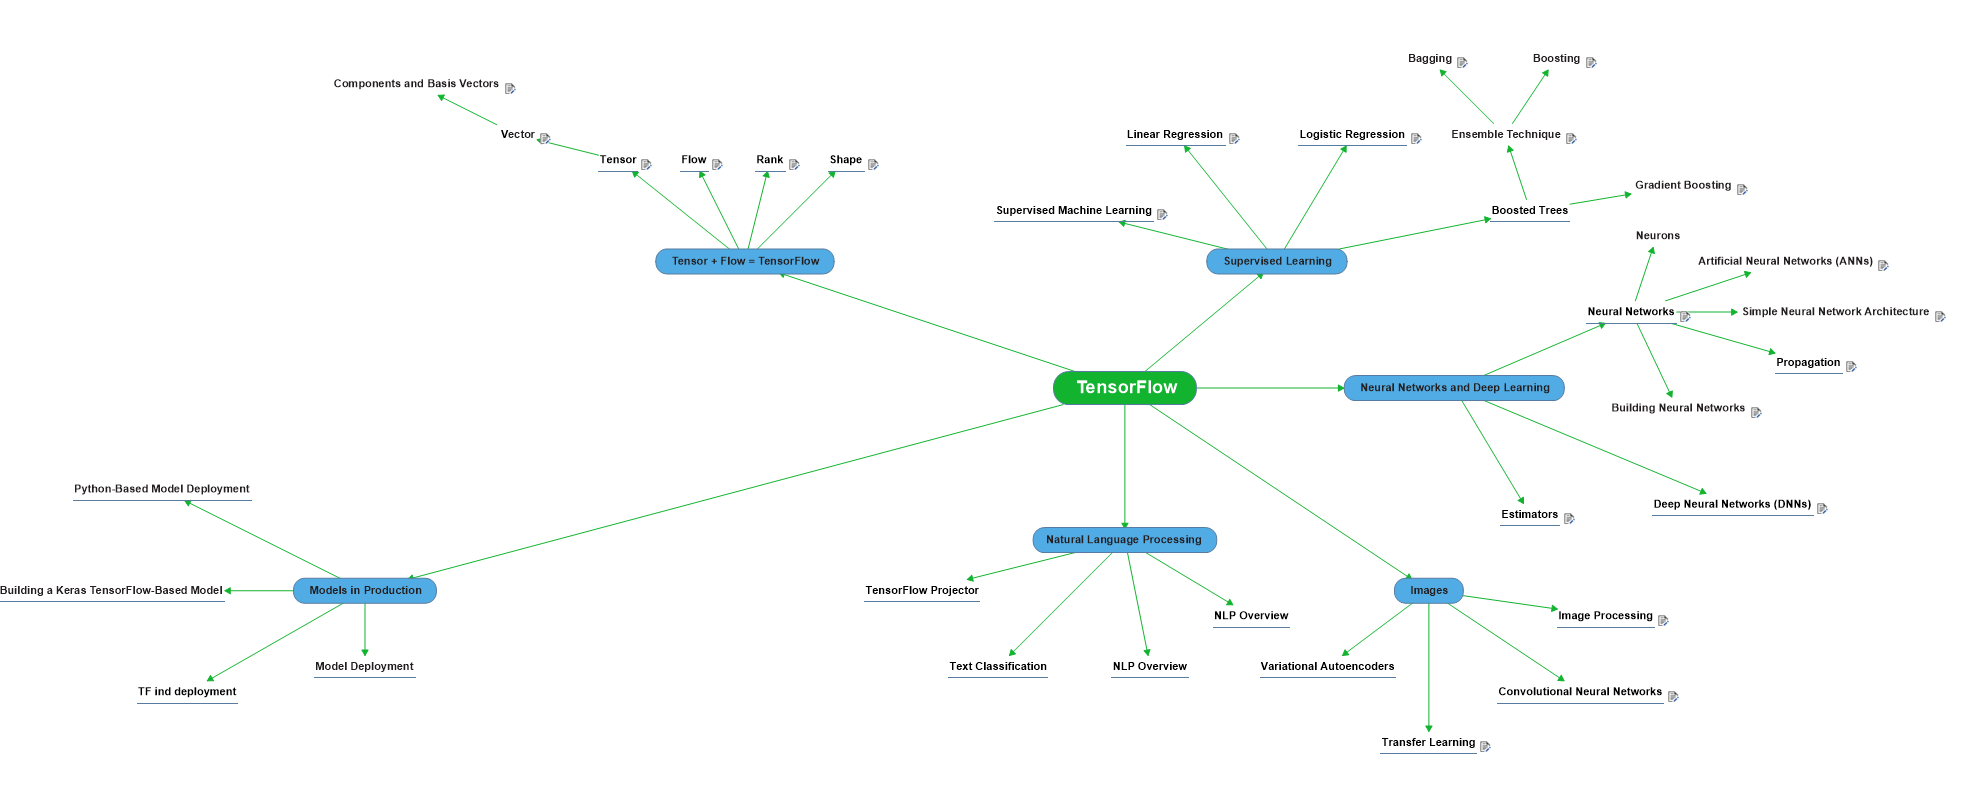

В качетсве основной методологиии я использовал CRISP-DM как наиболее ясную и практичну с точки зрения достижения целей бизнеса и ораганизации процесса исследования и моделирования данных. https://www.notion.so/CRISP-DM-0de6b8638a6048bb8024a7b1dba3df44

### Этапы исследования 

Исследование производилось в соответствии с означенной выше методолонигий и ее шаблоном

В качестве искходной статьи, я воспользовался примером из книги: https://colab.research.google.com/drive/1izbw83vFbBTgLrxrIKQ8hmiVFea_DBS6?usp=sharing

В целом статья предлагает пошаговое объяснение и постороение базовой модели на примере Fashion MNIST